<a href="https://colab.research.google.com/github/jimsjoo/gilbut_portfolio/blob/master/kNN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
url = 'https://raw.githubusercontent.com/jimsjoo/gilbut_portfolio/master/stocks.csv'
dataset = pd.read_csv(url)

In [3]:
dataset.head()

,Date,Apple,Google,MSFT,Increase
0,2010-01-04,214.009998,626.750011,30.950001,True
1,2010-01-05,214.379993,623.990017,30.959999,True
2,2010-01-06,210.969995,608.259974,30.770000,False
3,2010-01-07,210.580000,594.100015,30.450001,False
4,2010-01-08,211.980005,602.020005,30.660000,True


In [0]:
crit_train=dataset['Date']<'2014'
crit_test =dataset['Date']>='2014'
print(dataset[crit_train].tail())
print(dataset[crit_test].head())

            Date       Apple       Google       MSFT  Increase
1001  2013-12-24  567.669975  1111.840064  37.080002     False
1002  2013-12-26  563.900009  1117.460049  37.439999     False
1003  2013-12-27  560.089989  1118.400026  37.290001     False
1004  2013-12-30  554.519981  1109.460000  37.290001     False
1005  2013-12-31  561.019997  1120.709970  37.410000      True
            Date       Apple       Google       MSFT  Increase
1006  2014-01-02  553.129990  1113.120033  37.160000     False
1007  2014-01-03  540.980019  1104.999987  36.910000     False
1008  2014-01-06  543.929993  1117.320052  36.130001      True
1009  2014-01-07  540.040024  1138.860015  36.410000     False
1010  2014-01-08  543.460022  1141.230079  35.759998      True


In [0]:
predictors = dataset[['Apple','Google','MSFT']]
data_train = predictors[crit_train]
data_test = predictors[crit_test]
data_inc = dataset[['Increase']][crit_train]

In [15]:
X=dataset.iloc[:,1:-1]
y=dataset.iloc[:,-1]
print(dataset.head())
print(X[:5])
print(y[:5])

         Date       Apple      Google       MSFT  Increase
0  2010-01-04  214.009998  626.750011  30.950001      True
1  2010-01-05  214.379993  623.990017  30.959999      True
2  2010-01-06  210.969995  608.259974  30.770000     False
3  2010-01-07  210.580000  594.100015  30.450001     False
4  2010-01-08  211.980005  602.020005  30.660000      True
        Apple      Google       MSFT
0  214.009998  626.750011  30.950001
1  214.379993  623.990017  30.959999
2  210.969995  608.259974  30.770000
3  210.580000  594.100015  30.450001
4  211.980005  602.020005  30.660000
0     True
1     True
2    False
3    False
4     True
Name: Increase, dtype: bool


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [17]:
print(X_train[:5])
print(X_test[:5])

          Apple      Google       MSFT
384  358.019997  538.260036  26.629999
653  622.550003  642.819985  29.950001
234  318.210007  587.140002  26.870001
365  326.749989  502.950014  23.740000
570  636.229996  630.840033  31.100000
           Apple      Google       MSFT
1357  132.039993  554.250000  47.610001
577   608.340012  607.449994  31.139999
893   418.989990  903.800019  31.820000
45    224.839993  576.450019  28.969999
1373  127.879997  556.179993  46.720001


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[64 79]
 [76 74]]
              precision    recall  f1-score   support

       False       0.46      0.45      0.45       143
        True       0.48      0.49      0.49       150

    accuracy                           0.47       293
   macro avg       0.47      0.47      0.47       293
weighted avg       0.47      0.47      0.47       293



In [0]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

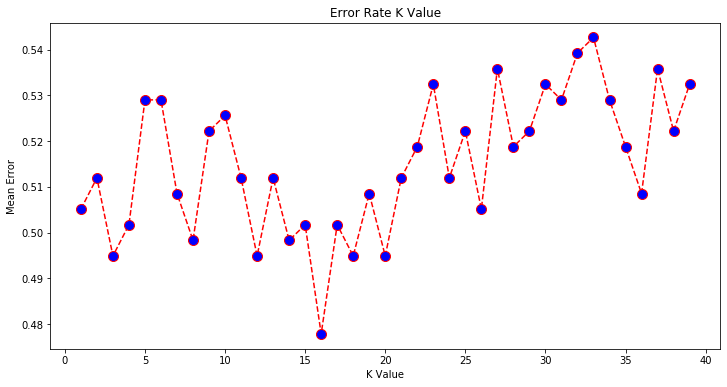

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')